In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [241]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [242]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/FakeNews'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/FakeNews


'/content/gdrive/My Drive/Colab Notebooks/FakeNews'

# Loading a smaller dataset (Optional) 

In [ ]:
df = pd.read_csv("claimskg.csv")
df.columns

Index(['id', 'text', 'date', 'truthRating', 'ratingName', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

In [ ]:
f = lambda x : 1 if (x == 3) else 0
df["truthRating"] = df["truthRating"].apply(f)

In [ ]:
import random
from sklearn.model_selection import train_test_split 


In the example below we choose 300 examples of True and 300 False

In [ ]:
df2 = df.copy()
df2 = df[["text","truthRating"]]
bool_0 = df2["truthRating"] == 0
bool_1 = df2["truthRating"] == 1
idx0 = [i for i, x in enumerate(bool_0) if x]
idx1 = [i for i, x in enumerate(bool_1) if x]
# selecting 300 index of Fake News and True News
idx_0 = random.sample(idx0, 300)	
idx_1 = random.sample(idx1, 300)	

In [ ]:
idx_selected = np.sort(np.concatenate((idx_0,idx_1), axis=None))
df2 = df2.iloc[idx_selected]
train, test = train_test_split(df2, test_size=0.3, random_state=42, shuffle=True)

Saving Data in 2 csv file

In [ ]:
train.to_csv("train.csv",sep=';')
test.to_csv("test.csv",sep=';')

In [ ]:
test.describe()

# Ingenierie Textuelle

### Installation Packages

In [243]:
!pip install langdetect 
!pip install contractions

In [244]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

## detection de language
import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import RegexpParser

# il est possible de charger l'ensemble des librairies en une seule fois 
# décocher le commentaire de la ligne ci-dessous
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy
from spacy.tokens import Span
# il faut sélectionner pour quelle langue les traitements vont être faits.
nlp = spacy.load('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Data

In [245]:
df_train = pd.read_csv("train.csv",sep=";")
df_test = pd.read_csv("test.csv",sep=";")

In [246]:
df_train = df_train[["text","truthRating"]]
df_test = df_test[["text","truthRating"]]

### Text Preprocessing





In [247]:
# TO DO
# Eliminate handles and URLs
# Tokenize the string into words. 
# Remove stop words like "and, is, a, on, etc."
# Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this. 
# Convert all your words to lower case
# BONUS here getting rid of all numbers which has been captured like word when preprocess

In [248]:
text = np.concatenate((df_train["text"],df_test["text"]))

def contains_digit(word):
  for c in word:
    if c.isdigit():
      return True
  return False

stopwords = np.array(nltk.corpus.stopwords.words('english'))

for i,sentence in zip(range(len(text)),text):
  # Removing punctuation
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  sentence = tokenizer.tokenize(sentence)

  sentence = " ".join(sentence)
  sentence = word_tokenize(sentence)

  # converting each word to lowercase
  sentence = [word.lower() for word in sentence if not word in stopwords]

  # Removing stopwords
  sentence = [word for word in sentence if not word in stopwords]

  # Removing word with only one letter
  sentence = [word for word in sentence if len(word) != 1]

  # Removing word with digits
  sentence = [word for word in sentence if not contains_digit(word)]

  # stemming words 
  ps = PorterStemmer()
  sentence = [ps.stem(word) for word in sentence]

  # Removing pronouns infinitive verbs dt...
  for word in nltk.pos_tag(sentence):
    word_to_keep = []
    if word[1] not in ['IN', 'PP', 'DT','PRP$','VB','MD']:
      word_to_keep.append(word[0])
  
  sentence = (" ").join(sentence)
  text[i] = sentence

text

array(['photograph show berni sander civil right march martin luther king jr',
       'photograph show larg group biker way donald trump inaugur',
       'third south african risk alcohol problem africa check',
       'internet circul coupon redeem free bag dorito brand tortilla chip',
       'automobil florida spot bear statement express support public execut trump critic',
       'compendium hilari letter advic columnist dear abbi',
       'report came continu presid obama polici look percent unemploy next year fourth quarter',
       'student dress refere spread birdse school footbal field everi day summer school first home game fall field becom inund bird soon refere step onto field',
       'say rick scott chang promis job creat top normal growth would job',
       'teacher impart lesson valu freedom veteran return student desk',
       'studi link eat grit increas chanc father gay child',
       'sarah palin nation guard command',
       'enact biggest tax cut reform american his

In [249]:
df_train["text"] = text[:len(df_train)]
df_test["text"] = text[len(df_train):]

### TFIDF on text set (OPTIONAL)





In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text[:420])
feature_names_train = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_word_train = pd.DataFrame(denselist, columns=feature_names_train)
df_word_train.head(2)

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text[420:])
feature_names_test = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_word_test = pd.DataFrame(denselist, columns=feature_names_test)
df_word_test.head(2)

,abnorm,aboard,abort,abraham,abram,abus,accept,access,account,achiev,across,act,action,activ,actor,actual,addit,administr,adopt,advoc,affair,afford,african,age,agent,agre,air,aircraft,airlin,akbar,al,alabama,alarm,album,alfr,alic,allahu,alleg,allen,allow,...,war,warn,warship,water,way,weaken,wealth,wear,web,wed,wednesday,went,wheelchair,whether,white,whole,wikileak,william,win,window,winehous,witch,within,without,woman,women,work,worker,world,wors,would,wound,wrong,wrote,ye,year,yet,york,yoshihito,youtub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.331179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(len(feature_names_train),len(feature_names_test))
feature_to_keep = np.intersect1d(feature_names_train,feature_names_test)
len(feature_to_keep)

2098 1119


599

In [ ]:
df_X_train = df_word_train[feature_to_keep]
df_X_test = df_word_test[feature_to_keep]

### Feature Extraction with Term Frequency

In [250]:
# use of tfidf vectorizer only to get all features names = words in the corpus
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text)
corpus = np.array(vectorizer.get_feature_names())
truth_value = np.concatenate((df_train["truthRating"],df_test["truthRating"]))

# get together all the fake news and the true news text
bool_0 = truth_value == 0
bool_1 = truth_value == 1
idx0 = [i for i, x in enumerate(bool_0) if x]
idx1 = [i for i, x in enumerate(bool_1) if x]
fake_text = text[idx0]
non_fake_text = text[idx1]

# Computes 2 different frequency use of dictionary for O(1) time acces to value of a paticular word
FakeFreq = dict(zip(corpus,np.zeros(corpus.shape)))
NonFakeFreq = dict(zip(corpus,np.zeros(corpus.shape)))

fake_text = " ".join(fake_text)
fake_text = word_tokenize(fake_text)
non_fake_text = " ".join(non_fake_text)
non_fake_text = word_tokenize(non_fake_text)

for word in fake_text:
  FakeFreq[word] += 1

for word in non_fake_text:
  NonFakeFreq[word] += 1

In [251]:
def feat_extraction_fake(row):
  row_text = word_tokenize(row)
  sum_fake_freq = 0
  for word in row_text:
    sum_fake_freq += FakeFreq[word]
  return sum_fake_freq

def feat_extraction_no_fake(row):
  row_text = word_tokenize(row)
  sum_non_fake_freq = 0
  for word in row_text:
    sum_non_fake_freq += NonFakeFreq[word]
  return sum_non_fake_freq

df_train["bias"] = 1
df_train["fake"] = df_train["text"].apply(feat_extraction_fake)
df_train["no fake"] = df_train["text"].apply(feat_extraction_no_fake)

df_test["bias"] = 1
df_test["fake"] = df_test["text"].apply(feat_extraction_fake)
df_test["no fake"] = df_test["text"].apply(feat_extraction_no_fake)

df_X_train = df_train[["bias","fake","no fake"]]
df_X_test = df_test[["bias","fake","no fake"]]

In [252]:
df_train.head()

,text,truthRating,bias,fake,no fake
0,photograph show berni sander civil right march...,0,1,68.0,51.0
1,photograph show larg group biker way donald tr...,0,1,93.0,75.0
2,third south african risk alcohol problem afric...,0,1,25.0,18.0
3,internet circul coupon redeem free bag dorito ...,0,1,20.0,5.0
4,automobil florida spot bear statement express ...,1,1,38.0,62.0


# Premier Entrainement Modèle

### import useful module

In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import random

In [ ]:
array_train,array_test = df_X_train.values, df_X_test.values
X_train,y_train = array_train,df_train["truthRating"] 
X_test,y_test = array_test,df_test["truthRating"]

### Entrainement sur RandomForest

In [ ]:
model = RandomForestClassifier(n_estimators = 10)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [254]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [256]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
target_names = ["Fake","No Fake"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.89      0.85      0.87        98
     No Fake       0.83      0.88      0.85        82

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



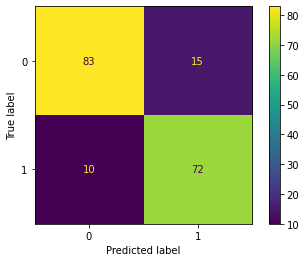

In [257]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

### testing multiples Parametres RF

In [ ]:
grid_param = {'n_estimators': [4, 6, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [ ]:
gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=grid_param,
                    scoring='accuracy',
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True)

In [ ]:
gd_sr.fit(X_train, y_train)
print ('meilleur score ',
 gd_sr.best_score_,'\n')
print ('meilleurs paramètres',
 gd_sr.best_params_,'\n')
print ('meilleur estimateur',
gd_sr.best_estimator_,'\n')

meilleur score  0.880952380952381 

meilleurs paramètres {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 9} 

meilleur estimateur RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       n_estimators=9) 



<p>
Le modèle performe très mal un processing supplémentaire sur les données va êtres nécessaires accuracy obtenu avec le TF_IDF seulement 55~60%
</p>
<p>
[EDIT] Avec de la feature extraction + term frequency résultat ~90% Bien meilleur !
</p>

### SVM

In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8611111111111112

# A suivre